In [3]:
from mss import mss
import pyautogui
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt
import time
from gym import Env
from gym.spaces import Box, Discrete

/home/kumar-vedant/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Setup custom Environment

In [79]:
class Game(Env):
    def __init__(self):
        super().__init__()
        
        self.observation_space = Box(low=0, high=255, shape=(1,83,100), dtype=np.uint8)
        self.action_space = Discrete(3)
        
        # setup game capture frame locations
        self.cap = mss()
        self.game_location = {'top': 300, 'left': 0, 'width': 600, 'height': 500}
        self.done_location = {'top': 405, 'left': 630, 'width': 660, 'height': 70}
    def step(self, action):
        action_map = {
            0:'space',
            1:'down',
            2:'no_op'
        }
        if action < 2:
            # press the button for the action given
            pyautogui.press(action_map[action])

        # check if game over
        done, done_cap = self.get_done()
        # get observation for the next step
        observation = self.get_observation()
        # set reward
        reward = 1
        info = {}
        return observation, reward, done, info
    
    # restart the game
    def reset(self):
        time.sleep(1)
        pyautogui.click(x=150, y=150)
        pyautogui.press('space')
        return self.get_observation()
    
    def get_observation(self):
        # capture the screen in the defined area
        raw = np.array(self.cap.grab(self.game_location))[:,:,:3]
        # convert image to grayscale
        gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
        # resize
        resized = cv2.resize(gray, (100,83))
        # put channels at the first (for stable baselines) and (width, height)
        channel = np.reshape(resized, (1,83,100))
        return channel
    
    def get_done(self):
        # capture the screen in the defined area for the 'Game Over' text
        done_cap = np.array(self.cap.grab(self.done_location))[:,:,:3]
        done_strings = ['GAME', 'GAHE']
        done=False

        # read the text from the image (apply OCR) and extract the first 4 characters
        res = pytesseract.image_to_string(done_cap)[:4]
        # if the first 4 characters are either "GAME" or "GAHE", end the episode
        if res in done_strings:
            done = True
        return done, done_cap

In [80]:
env = Game()

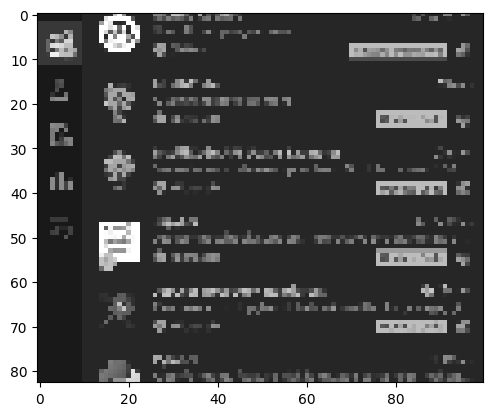

In [83]:
plt.imshow(cv2.cvtColor(env.get_observation()[0], cv2.COLOR_BGR2RGB))

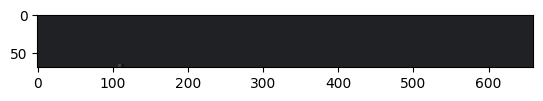

In [74]:
done, done_cap = env.get_done()
plt.imshow(cv2.cvtColor(done_cap, cv2.COLOR_BGR2RGB))

In [75]:
env = Game()

In [78]:
env.reset()

array([[[33, 33, 33, ..., 33, 33, 33],
        [33, 33, 33, ..., 33, 33, 33],
        [33, 33, 33, ..., 33, 33, 33],
        ...,
        [33, 33, 33, ..., 33, 33, 33],
        [33, 33, 33, ..., 33, 33, 33],
        [33, 33, 33, ..., 33, 33, 33]]], dtype=uint8)